## Classification problem - Brain MRI Dataset

Dataset: Brain Tumor Classification (MRI)
https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

Problem of classification brain MRI images between "no tumor" and 3 kinds of tumors: glioma, meningioma and pituitary tumor. 


### importing libraries

In [1]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import keras
from keras import models 
from keras import layers
import tensorflow as tf
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB3
from keras import regularizers

### Functions for plotting charts

In [19]:
# single Accuracy
def PlotAccuracy(acc1, val_acc1, lab1 = '1'):
    plt.clf()   
    plt.rcParams['figure.figsize'] = (25.0, 5.0) 
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy for ' + lab1)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [13]:
# single Loss
def PlotLoss(loss1, val_loss1, lab1 = '1'):
    plt.clf()   
    plt.rcParams['figure.figsize'] = (25.0, 5.0) 
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_loss1, 'b', label='Validation loss for ' + lab1)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [41]:
# 3 Accuracy
def Compare3Accuracy(acc1, val_acc1,acc2,val_acc2,acc3,val_acc3, lab1 = '1',lab2 = '2',lab3 = '3'):
    plt.clf()   
    plt.rcParams['figure.figsize'] = (25.0, 5.0) 
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label=lab1)
    plt.plot(epochs, acc2, 'ro', label=lab2)
    plt.plot(epochs, acc3, 'go', label=lab3)
    plt.plot(epochs, val_acc1, 'b', label=lab1)
    plt.plot(epochs, val_acc2, 'r', label=lab2)
    plt.plot(epochs, val_acc3, 'g', label=lab3)
    plt.title('Comparison of Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
# 3 Loss
def Compare3Loss(loss1, val_loss1, lab1 = '1'):
    plt.clf()   
    plt.rcParams['figure.figsize'] = (25.0, 5.0) 
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, acc1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, acc1, 'bo', label='Training loss for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation loss for ' + lab1)
    plt.plot(epochs, val_acc1, 'b', label='Validation loss for ' + lab1)
    plt.title('Comparison of Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Preparing Data (grayscale)

In [2]:
model_dir = 'C:/Users/PC/Desktop/projekt/'
dataset_dir = 'C:/Users/PC/Desktop/mri_brain/'

categories = {"no_tumor":0,"pituitary_tumor":1,"meningioma_tumor":2,"glioma_tumor":3}

RES = 128 

def get_data(directory):
    data = []
    target = []
    mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
    count=0
    for file in os.listdir(directory):
        path=os.path.join(directory,file)
        for im in os.listdir(path):
            image=load_img(os.path.join(path,im), color_mode="grayscale", target_size=(RES,RES))
            image=img_to_array(image)
            image = image/255.0 
            data.append(image)
            target.append(count)  
        count=count+1
    return (data,target)

In [3]:
(x_train, y_train) = get_data('C:/Users/PC/Desktop/mri_brain/Training')
(x_test, y_test) = get_data('C:/Users/PC/Desktop/mri_brain/Testing')

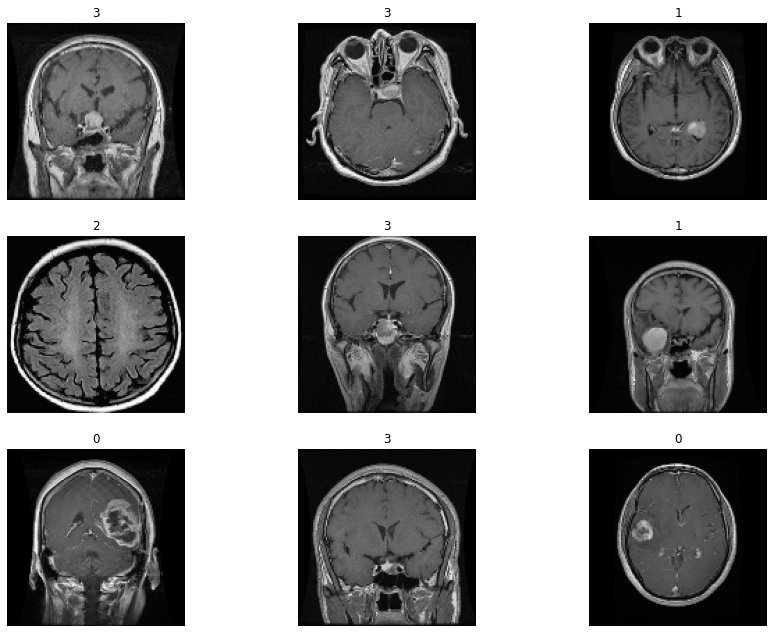

In [6]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)

for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, len(x_train))
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off')
        ax.set_title(y_train[num_image])
        ax.imshow(x_train[num_image], cmap='Greys_r')

In [4]:
# Change to np array
x_train_cn = np.asarray(x_train).reshape(len(x_train), RES, RES, 1)
x_test_cn = np.asarray(x_test).reshape(len(x_test), RES, RES, 1)
y_train_cn = np.asarray(y_train)
y_test_cn = np.asarray(y_test)

# Change to float32 to increase precision
x_train_cn = x_train_cn.astype('float32')
x_test_cn = x_test_cn.astype('float32')

# normalize data
x_train_cn = x_train_cn / 255.0
x_test_cn = x_test_cn / 255.0

# One hot encode labels
y_train_cn = tf.keras.utils.to_categorical(y_train_cn, 4)
y_test_cn = tf.keras.utils.to_categorical(y_test_cn, 4)

# Split training data inot training and validation
x_train_split, x_validation_split, y_train_split, y_validation_split = train_test_split(x_train_cn, y_train_cn, shuffle=True, random_state=101)  # 75% split

In [16]:
print(len(x_train_split))
print(len(x_validation_split))
print(len(x_train_cn ))
print(len(x_test_cn))

2152
718
2870
394


### Preparing Data (RGB)

In [1]:
def get_data3(directory):
    data = []
    target = []
    mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
    count=0
    for file in os.listdir(directory):
        path=os.path.join(directory,file)
        for im in os.listdir(path):
            image=load_img(os.path.join(path,im), target_size=(RES,RES))
            image=img_to_array(image)
            image = image/255.0 #normalize
            data.append(image)
            target.append(count)  
        count=count+1
    return (data,target)

In [7]:
(x_trainRES, y_trainRES) = get_data3('C:/Users/PC/Desktop/mri_brain/Training')
(x_testRES, y_testRES) = get_data3('C:/Users/PC/Desktop/mri_brain/Testing')

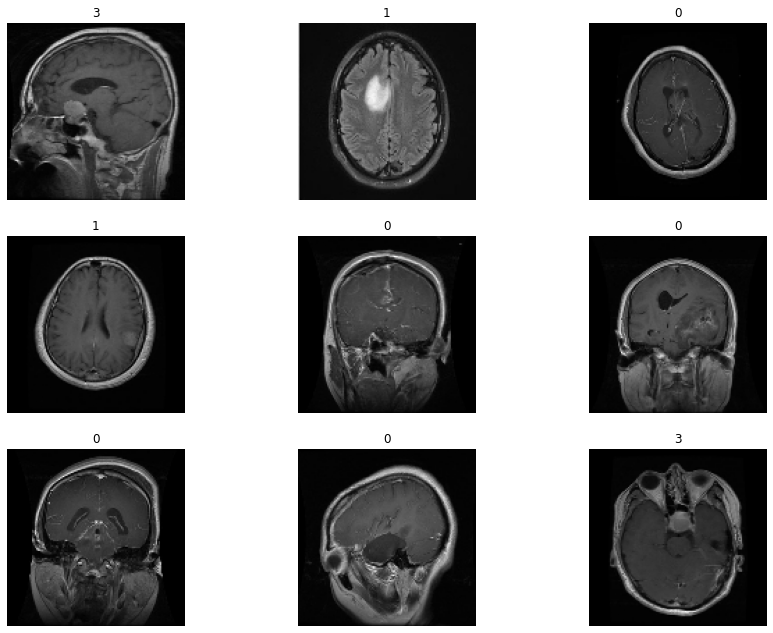

In [20]:
fig = plt.figure(figsize=(20,15))
gs = fig.add_gridspec(4, 4)
#
for line in range(0, 3):
    for row in range(0, 3):
        num_image = random.randint(0, len(x_trainRES))
        ax = fig.add_subplot(gs[line, row])
        ax.axis('off')
        ax.set_title(y_trainRES[num_image])
        ax.imshow(x_trainRES[num_image])

In [8]:
# Change to np array
x_train_cnRES = np.asarray(x_trainRES).reshape(len(x_trainRES), RES, RES, 3)
x_test_cnRES = np.asarray(x_testRES).reshape(len(x_testRES), RES, RES, 3)
y_train_cnRES = np.asarray(y_trainRES)
y_test_cnRES = np.asarray(y_testRES)

# Change to float32 to increase precision
x_train_cnRES = x_train_cnRES.astype('float32')
x_test_cnRES = x_test_cnRES.astype('float32')

# normalize data
x_train_cnRES = x_train_cnRES / 255.0
x_test_cnRES = x_test_cnRES / 255.0

# One hot encode labels
y_train_cnRES = tf.keras.utils.to_categorical(y_train_cnRES, 4)
y_test_cnRES = tf.keras.utils.to_categorical(y_test_cnRES, 4)

# Shuffle data in training set

# Split training data inot training and validation
x_train_splitRES, x_validation_splitRES, y_train_splitRES, y_validation_splitRES = train_test_split(x_train_cnRES, y_train_cnRES, shuffle=True, random_state=101)

### Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=7, #rotate images
    width_shift_range=0.05,
    height_shift_range=0.05, #shift image in horizontal and vertical
    zoom_range=0.1, #zoom images
    horizontal_flip=True)

### Models

In [30]:
def CreateDensityModel(hl1 = 16, hl2 = 8):
    modelShape = models.Sequential()
    modelShape.add(layers.Dense(hl1, activation='relu', input_shape=(RES,RES,1)))
    modelShape.add(layers.Dense(hl2, activation='relu'))
    modelShape.add(layers.Flatten())
    modelShape.add(layers.Dense(4, activation='softmax'))
    return modelShape

In [31]:
modelShape = CreateDensityModel(hl1=16, hl2 =8)
modelShape.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128, 128, 16)      32        
                                                                 
 dense_7 (Dense)             (None, 128, 128, 8)       136       
                                                                 
 flatten_2 (Flatten)         (None, 131072)            0         
                                                                 
 dense_8 (Dense)             (None, 4)                 524292    
                                                                 
Total params: 524,460
Trainable params: 524,460
Non-trainable params: 0
_________________________________________________________________


In [32]:
def compile_model(modelShape):
    modelShape.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics="acc")
    return modelShape

In [66]:
modelShape = compile_model(modelShape)
historyShape1 = modelShape.fit(x_train_split, y_train_split,
                    batch_size=64,
                    epochs=20,
                    validation_data = (x_validation_split,y_validation_split)
                    )
                      

Epoch 1/20
34/34 [==============================] - 2s 33ms/step - loss: 1.3643 - acc: 0.2830 - val_loss: 1.3675 - val_acc: 0.2744
Epoch 2/20
34/34 [==============================] - 1s 27ms/step - loss: 1.3581 - acc: 0.2918 - val_loss: 1.3448 - val_acc: 0.2744
Epoch 3/20
34/34 [==============================] - 1s 28ms/step - loss: 1.3556 - acc: 0.2844 - val_loss: 1.3435 - val_acc: 0.2744
Epoch 4/20
34/34 [==============================] - 1s 28ms/step - loss: 1.3524 - acc: 0.3336 - val_loss: 1.3421 - val_acc: 0.2939
Epoch 5/20
34/34 [==============================] - 1s 28ms/step - loss: 1.3597 - acc: 0.2858 - val_loss: 1.3558 - val_acc: 0.3022
Epoch 6/20
34/34 [==============================] - 1s 28ms/step - loss: 1.3573 - acc: 0.3239 - val_loss: 1.3425 - val_acc: 0.2939
Epoch 7/20
34/34 [==============================] - 1s 28ms/step - loss: 1.3584 - acc: 0.3160 - val_loss: 1.3484 - val_acc: 0.3022
Epoch 8/20
34/34 [==============================] - 1s 28ms/step - loss: 1.3544 - a

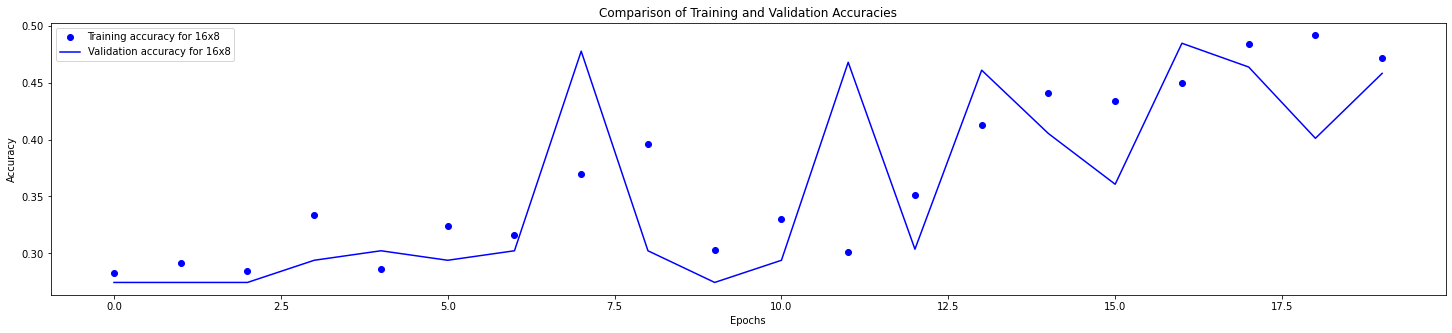

In [67]:
acc1Shape = historyShape1.history['acc']
val_acc1Shape = historyShape1.history['val_acc']

PlotAccuracy(acc1Shape, val_acc1Shape, '16x8')

In [8]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(RES, RES, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 50176)             0

In [9]:
epochs = 150       # the number of training epochs
batch_size = 256  # the size of mini-batches used for training the network in one step

model1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model1.save_weights(model_dir + 'projekt_CNN_VERSION3.h5')

history1 = model1.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
9/9 [==============================] - 13s 351ms/step - loss: 1.3790 - acc: 0.2807 - val_loss: 1.3533 - val_acc: 0.2939
Epoch 2/150
9/9 [==============================] - 1s 165ms/step - loss: 1.3612 - acc: 0.2876 - val_loss: 1.3444 - val_acc: 0.3022
Epoch 3/150
9/9 [==============================] - 1s 164ms/step - loss: 1.3547 - acc: 0.2830 - val_loss: 1.3413 - val_acc: 0.3022
Epoch 4/150
9/9 [==============================] - 1s 165ms/step - loss: 1.3529 - acc: 0.2830 - val_loss: 1.3415 - val_acc: 0.3022
Epoch 5/150
9/9 [==============================] - 1s 164ms/step - loss: 1.3513 - acc: 0.2788 - val_loss: 1.3469 - val_acc: 0.2744
Epoch 6/150
9/9 [==============================] - 1s 165ms/step - loss: 1.3512 - acc: 0.2700 - val_loss: 1.3431 - val_acc: 0.2744
Epoch 7/150
9/9 [==============================] - 1s 163ms/step - loss: 1.3517 - acc: 0.2890 - val_loss: 1.3551 - val_acc: 0.2744
Epoch 8/150
9/9 [==============================] - 1s 164ms/step - loss: 1.3533 - 

In [10]:
hist_df = pd.DataFrame(history1.history) 

hist_csv_file = 'history_CNN2_V3.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

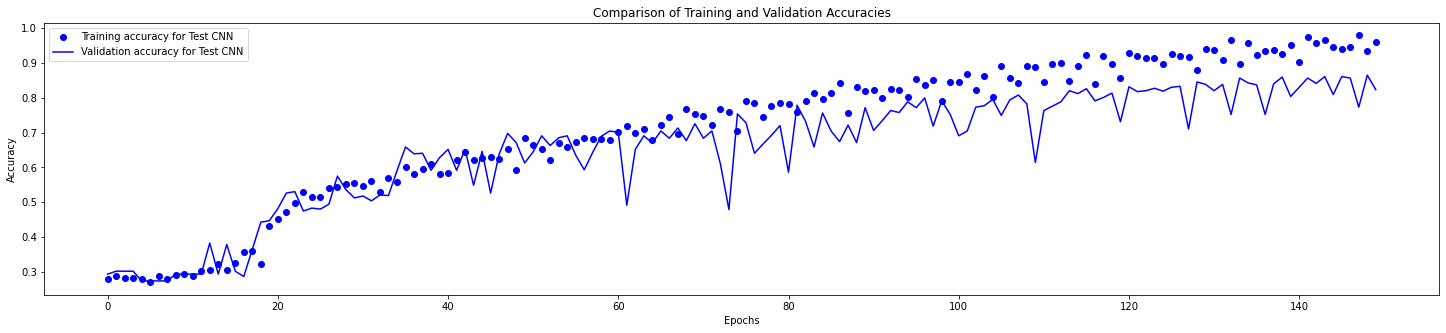

In [68]:
df = pd.read_csv('C:/Users/PC/Desktop/projekt/history_CNN2_V3.csv')
acc1 = df['acc']
val_acc1 = df['val_acc']

PlotAccuracy(acc1, val_acc1, 'Test CNN')

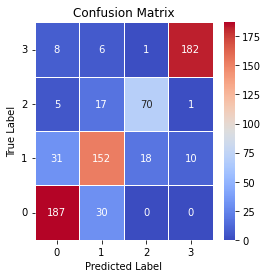

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       217
           1       0.74      0.72      0.73       211
           2       0.79      0.75      0.77        93
           3       0.94      0.92      0.93       197

    accuracy                           0.82       718
   macro avg       0.82      0.81      0.82       718
weighted avg       0.82      0.82      0.82       718



In [42]:
LABELS= ['0', '1', '2', '3']
num_classes = 4
# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(4, 4))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    #hm.invert_yaxis() # Invert the labels of the y-axis
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_val = model1.predict(x_validation_split)

# Take the class with the highest probability from the val predictions as a winning one
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_validation_split, axis=1)

# Show the confution matrix of the collected results
show_confusion_matrix(max_y_val, max_y_pred_val, num_classes)

# Print classification report
print(classification_report(max_y_val, max_y_pred_val))

### same model with 0.9 splitting

In [30]:
x_train_90, x_validation_90, y_train_90, y_validation_90 = train_test_split(x_train_cn, y_train_cn, shuffle=True, random_state=101,train_size=0.9)  # 90% split

In [31]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(RES, RES, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten the output to input data to the Dense layer
model1.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 50176)            

In [32]:
epochs = 150      
batch_size = 256 

model1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model1.save_weights(model_dir + 'projekt_CNN_nosplittingV3.h5')

history1 = model1.fit(x_train_90, y_train_90, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_90,y_validation_90))

Epoch 1/150
11/11 [==============================] - 3s 203ms/step - loss: 1.3747 - acc: 0.2865 - val_loss: 1.3278 - val_acc: 0.2997
Epoch 2/150
11/11 [==============================] - 2s 147ms/step - loss: 1.3654 - acc: 0.2772 - val_loss: 1.3191 - val_acc: 0.2997
Epoch 3/150
11/11 [==============================] - 2s 147ms/step - loss: 1.3621 - acc: 0.2807 - val_loss: 1.3143 - val_acc: 0.3380
Epoch 4/150
11/11 [==============================] - 2s 147ms/step - loss: 1.3575 - acc: 0.2787 - val_loss: 1.3245 - val_acc: 0.2997
Epoch 5/150
11/11 [==============================] - 2s 147ms/step - loss: 1.3568 - acc: 0.2849 - val_loss: 1.3170 - val_acc: 0.3380
Epoch 6/150
11/11 [==============================] - 2s 148ms/step - loss: 1.3558 - acc: 0.2822 - val_loss: 1.3084 - val_acc: 0.3380
Epoch 7/150
11/11 [==============================] - 2s 147ms/step - loss: 1.3536 - acc: 0.2822 - val_loss: 1.3018 - val_acc: 0.3380
Epoch 8/150
11/11 [==============================] - 2s 148ms/step - 

In [33]:
hist_df = pd.DataFrame(history1.history) 

hist_csv_file = 'history_90V3.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

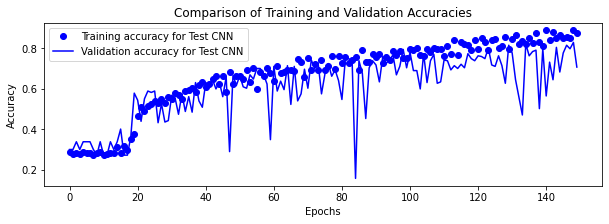

In [37]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

PlotAccuracy(acc1, val_acc1, 'Test CNN')

### Without splitting ( "Testing folder is for validation")

In [38]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(RES, RES, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten the output to input data to the Dense layer
model1.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4, activation='softmax'))

In [39]:
epochs = 150      
batch_size = 256 

model1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model1.save_weights(model_dir + 'projekt_CNN_nosplittingV3proper.h5')

history1 = model1.fit(x_train_cn, y_train_cn, epochs = epochs, batch_size = batch_size, validation_data=(x_test_cn,y_test_cn))

Epoch 1/150
12/12 [==============================] - 4s 248ms/step - loss: 1.3788 - acc: 0.2997 - val_loss: 1.4378 - val_acc: 0.2919
Epoch 2/150
12/12 [==============================] - 2s 156ms/step - loss: 1.3664 - acc: 0.2864 - val_loss: 1.3909 - val_acc: 0.2919
Epoch 3/150
12/12 [==============================] - 2s 157ms/step - loss: 1.3630 - acc: 0.2784 - val_loss: 1.3953 - val_acc: 0.2919
Epoch 4/150
12/12 [==============================] - 2s 157ms/step - loss: 1.3570 - acc: 0.2857 - val_loss: 1.4234 - val_acc: 0.2919
Epoch 5/150
12/12 [==============================] - 2s 158ms/step - loss: 1.3518 - acc: 0.2843 - val_loss: 1.4459 - val_acc: 0.2538
Epoch 6/150
12/12 [==============================] - 2s 156ms/step - loss: 1.3494 - acc: 0.2774 - val_loss: 1.4176 - val_acc: 0.1878
Epoch 7/150
12/12 [==============================] - 2s 156ms/step - loss: 1.3499 - acc: 0.2787 - val_loss: 1.4015 - val_acc: 0.1878
Epoch 8/150
12/12 [==============================] - 2s 155ms/step - 

In [40]:
hist_df = pd.DataFrame(history1.history) 

hist_csv_file = 'history_CNN2_V3_nosplit.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

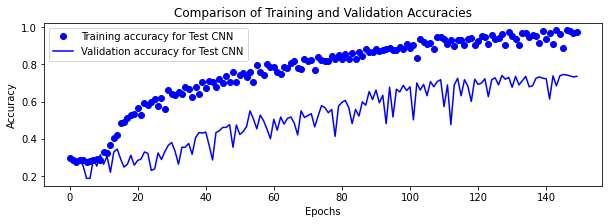

In [41]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

PlotAccuracy(acc1, val_acc1, 'Test CNN')

### Comparision

In [53]:
df1 = pd.read_csv('C:/Users/PC/Desktop/projekt/history_CNN2_V3.csv')
df2 = pd.read_csv('C:/Users/PC/Desktop/projekt/history_90V3.csv')
df3 = pd.read_csv('C:/Users/PC/Desktop/projekt/history_CNN2_V3_nosplit.csv')

In [54]:
a1 = df1['acc'] 
a2 = df2['acc'] 
a3 = df3['acc'] 
a1v = df1['val_acc'] 
a2v = df2['val_acc'] 
a3v = df3['val_acc'] 
label1 = '75% split'
label2 = '90% split'
label3 = 'no split'

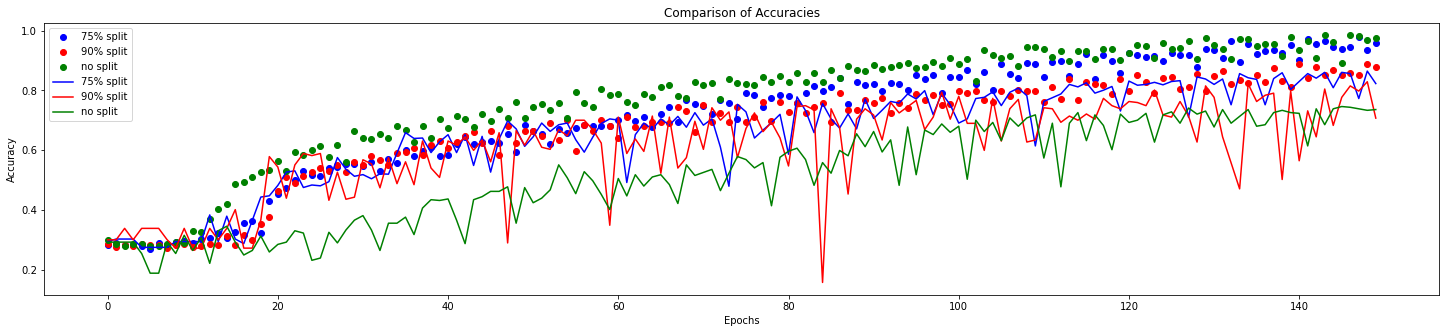

In [55]:
Compare3Accuracy(a1,a1v,a2,a2v,a3,a3v,label1,label2,label3)

### Different model (with dropout)

In [76]:
probdrop=0.5

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(RES, RES, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Dense(4, activation='softmax'))

In [78]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)       

In [77]:
epochs = 150       # the number of training epochs
batch_size = 256  # the size of mini-batches used for training the network in one step

model2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model2.save_weights(model_dir + 'dropoutV3_1.h5')

history = model2.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
9/9 [==============================] - 3s 202ms/step - loss: 1.3922 - acc: 0.2779 - val_loss: 1.3508 - val_acc: 0.3022
Epoch 2/150
9/9 [==============================] - 2s 183ms/step - loss: 1.3666 - acc: 0.2890 - val_loss: 1.3447 - val_acc: 0.3022
Epoch 3/150
9/9 [==============================] - 2s 181ms/step - loss: 1.3616 - acc: 0.2760 - val_loss: 1.3438 - val_acc: 0.3022
Epoch 4/150
9/9 [==============================] - 2s 183ms/step - loss: 1.3590 - acc: 0.2770 - val_loss: 1.3564 - val_acc: 0.3022
Epoch 5/150
9/9 [==============================] - 2s 181ms/step - loss: 1.3580 - acc: 0.2909 - val_loss: 1.3506 - val_acc: 0.3022
Epoch 6/150
9/9 [==============================] - 2s 182ms/step - loss: 1.3595 - acc: 0.2946 - val_loss: 1.3464 - val_acc: 0.3022
Epoch 7/150
9/9 [==============================] - 2s 182ms/step - loss: 1.3570 - acc: 0.2895 - val_loss: 1.3499 - val_acc: 0.3022
Epoch 8/150
9/9 [==============================] - 2s 181ms/step - loss: 1.3584 - a

In [80]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'history_dropout05.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [81]:
probdrop=0.15

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(RES, RES, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten the output to input data to the Dense layer
model2.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Dense(4, activation='softmax'))

In [83]:
epochs = 150       # the number of training epochs
batch_size = 256  # the size of mini-batches used for training the network in one step

model2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model2.save_weights(model_dir + 'dropoutV3_2.h5')

history = model2.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
9/9 [==============================] - 3s 203ms/step - loss: 1.3842 - acc: 0.2811 - val_loss: 1.3615 - val_acc: 0.2939
Epoch 2/150
9/9 [==============================] - 2s 182ms/step - loss: 1.3698 - acc: 0.2830 - val_loss: 1.3540 - val_acc: 0.3022
Epoch 3/150
9/9 [==============================] - 2s 174ms/step - loss: 1.3639 - acc: 0.2714 - val_loss: 1.3510 - val_acc: 0.2939
Epoch 4/150
9/9 [==============================] - 2s 173ms/step - loss: 1.3627 - acc: 0.2714 - val_loss: 1.3508 - val_acc: 0.2939
Epoch 5/150
9/9 [==============================] - 2s 169ms/step - loss: 1.3571 - acc: 0.2876 - val_loss: 1.3644 - val_acc: 0.2939
Epoch 6/150
9/9 [==============================] - 2s 169ms/step - loss: 1.3595 - acc: 0.2858 - val_loss: 1.3485 - val_acc: 0.2939
Epoch 7/150
9/9 [==============================] - 2s 178ms/step - loss: 1.3573 - acc: 0.2858 - val_loss: 1.3449 - val_acc: 0.2939
Epoch 8/150
9/9 [==============================] - 2s 173ms/step - loss: 1.3565 - a

In [84]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'history_dropout015.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [50]:
df1 = pd.read_csv('C:/Users/PC/Desktop/projekt/history_CNN2_V3.csv')
df2 = pd.read_csv('C:/Users/PC/Desktop/projekt/history_dropout05.csv')
df3 = pd.read_csv('C:/Users/PC/Desktop/projekt/history_dropout015.csv')

In [51]:
a1 = df1['acc'] 
a2 = df2['acc'] 
a3 = df3['acc'] 
a1v = df1['val_acc'] 
a2v = df2['val_acc'] 
a3v = df3['val_acc'] 
label1 = '75% split'
label2 = '0.5 dropout'
label3 = '0.15 dropout'

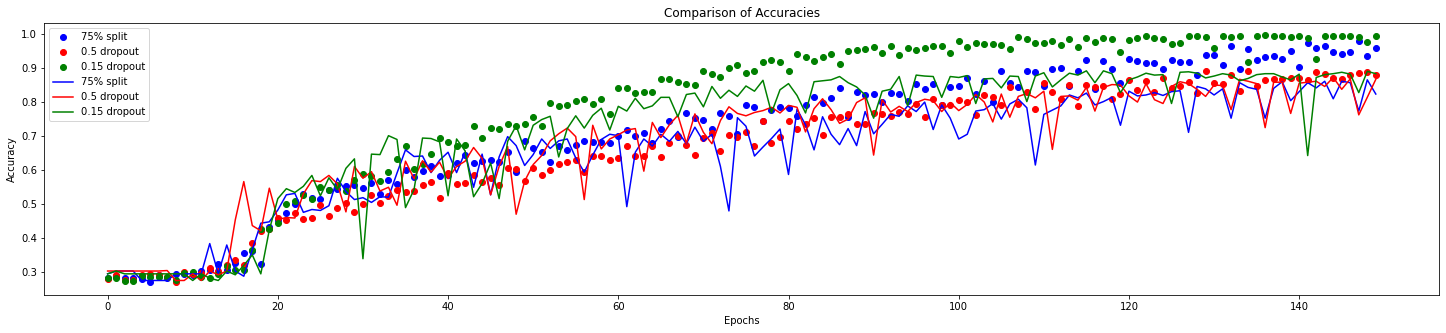

In [52]:
Compare3Accuracy(a1,a1v,a2,a2v,a3,a3v,label1,label2,label3)

### another model

In [61]:
probdrop=0.15

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (9, 9), activation='relu', input_shape=(RES, RES, 1)))
model2.add(layers.MaxPooling2D((3, 3)))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Conv2D(64, (5, 5), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Flatten the output to input data to the Dense layer
model2.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(probdrop))
model2.add(layers.Dense(4, activation='softmax'))

In [63]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 120, 120, 32)      2624      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 40, 40, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 18, 18, 64)        0

In [62]:
epochs = 150       # the number of training epochs
batch_size = 64  # the size of mini-batches used for training the network in one step

model2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model2.save_weights(model_dir + 'dropout_diffsize.h5')

history = model2.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
34/34 [==============================] - 4s 59ms/step - loss: 1.3611 - acc: 0.2816 - val_loss: 1.3419 - val_acc: 0.2939
Epoch 2/150
34/34 [==============================] - 1s 41ms/step - loss: 1.3564 - acc: 0.2825 - val_loss: 1.3431 - val_acc: 0.2744
Epoch 3/150
34/34 [==============================] - 1s 40ms/step - loss: 1.3560 - acc: 0.2756 - val_loss: 1.3420 - val_acc: 0.2744
Epoch 4/150
34/34 [==============================] - 1s 40ms/step - loss: 1.3541 - acc: 0.2770 - val_loss: 1.3403 - val_acc: 0.2744
Epoch 5/150
34/34 [==============================] - 1s 41ms/step - loss: 1.3425 - acc: 0.3174 - val_loss: 1.3067 - val_acc: 0.2925
Epoch 6/150
34/34 [==============================] - 1s 40ms/step - loss: 1.2978 - acc: 0.4205 - val_loss: 1.1873 - val_acc: 0.4972
Epoch 7/150
34/34 [==============================] - 1s 39ms/step - loss: 1.1708 - acc: 0.5046 - val_loss: 1.0955 - val_acc: 0.5808
Epoch 8/150
34/34 [==============================] - 1s 41ms/step - loss: 1.

In [64]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'dropout_diffsize.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

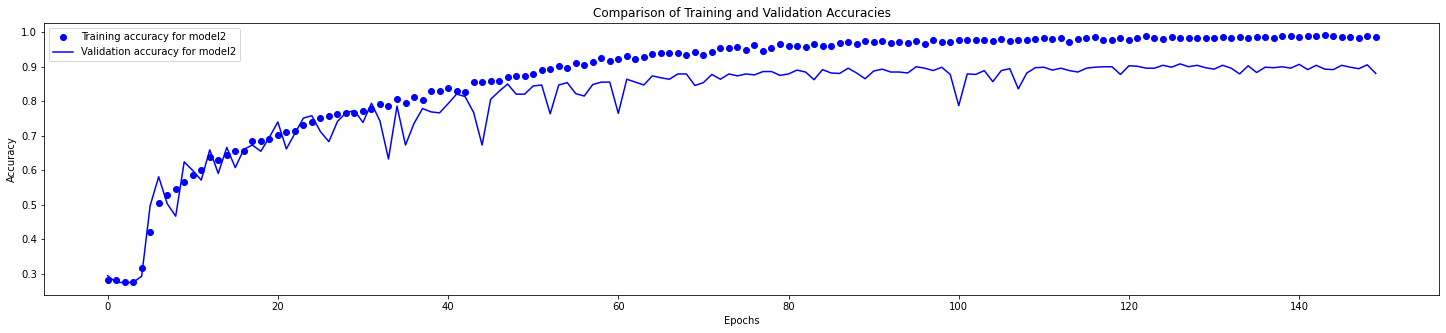

In [66]:
acc1 = history.history['acc']
val_acc1 = history.history['val_acc']

PlotAccuracy(acc1, val_acc1, 'model2')

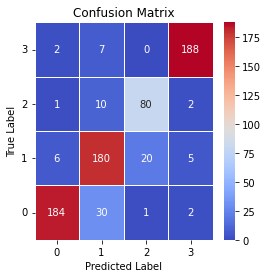

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       217
           1       0.79      0.85      0.82       211
           2       0.79      0.86      0.82        93
           3       0.95      0.95      0.95       197

    accuracy                           0.88       718
   macro avg       0.87      0.88      0.87       718
weighted avg       0.89      0.88      0.88       718



In [67]:
LABELS= ['0', '1', '2', '3']
num_classes = 4
# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(4, 4))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    #hm.invert_yaxis() # Invert the labels of the y-axis
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_val = model2.predict(x_validation_split)

# Take the class with the highest probability from the val predictions as a winning one
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_validation_split, axis=1)

# Show the confution matrix of the collected results
show_confusion_matrix(max_y_val, max_y_pred_val, num_classes)

# Print classification report
print(classification_report(max_y_val, max_y_pred_val))

### and another one :)  (best one)

In [73]:
probdrop=0.15

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (9, 9), activation='relu', input_shape=(RES, RES, 1)))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Conv2D(64, (9, 9), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Conv2D(64, (9, 9), activation='relu'))
# Flatten the output to input data to the Dense layer
model3.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Dense(4, activation='softmax'))

In [74]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 120, 120, 32)      2624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 40, 40, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        165952    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 10, 10, 64)       

In [75]:
epochs = 150       # the number of training epochs
batch_size = 64  # the size of mini-batches used for training the network in one step

model3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model3.save_weights(model_dir + 'dropout_diffsize3.h5')

history = model3.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
34/34 [==============================] - 3s 56ms/step - loss: 1.3703 - acc: 0.2872 - val_loss: 1.3575 - val_acc: 0.2939
Epoch 2/150
34/34 [==============================] - 1s 43ms/step - loss: 1.3472 - acc: 0.2825 - val_loss: 1.3625 - val_acc: 0.2744
Epoch 3/150
34/34 [==============================] - 1s 44ms/step - loss: 1.3309 - acc: 0.3411 - val_loss: 1.2746 - val_acc: 0.4429
Epoch 4/150
34/34 [==============================] - 1s 42ms/step - loss: 1.2598 - acc: 0.4414 - val_loss: 1.1517 - val_acc: 0.4916
Epoch 5/150
34/34 [==============================] - 1s 42ms/step - loss: 1.1572 - acc: 0.4940 - val_loss: 1.2195 - val_acc: 0.4304
Epoch 6/150
34/34 [==============================] - 1s 42ms/step - loss: 1.1230 - acc: 0.5056 - val_loss: 1.0969 - val_acc: 0.4944
Epoch 7/150
34/34 [==============================] - 1s 42ms/step - loss: 1.0681 - acc: 0.5386 - val_loss: 1.0096 - val_acc: 0.6086
Epoch 8/150
34/34 [==============================] - 1s 42ms/step - loss: 1.

In [76]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'dropout_diffsize3.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

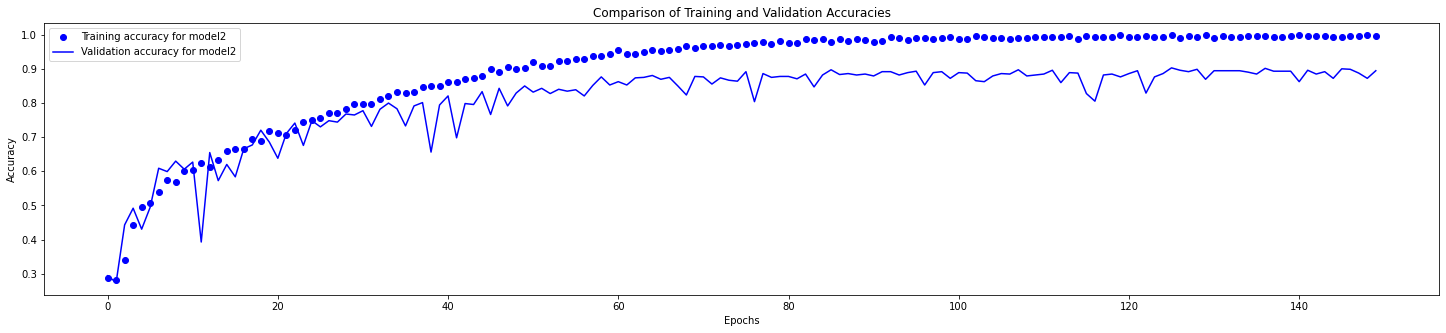

In [77]:
acc1 = history.history['acc']
val_acc1 = history.history['val_acc']

PlotAccuracy(acc1, val_acc1, 'model2')

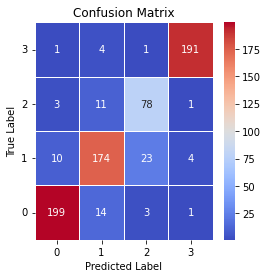

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       217
           1       0.86      0.82      0.84       211
           2       0.74      0.84      0.79        93
           3       0.97      0.97      0.97       197

    accuracy                           0.89       718
   macro avg       0.88      0.89      0.88       718
weighted avg       0.90      0.89      0.89       718



In [80]:
LABELS= ['0', '1', '2', '3']
num_classes = 4
# Define the confusion matrix for the results
def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(4, 4))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    #hm.invert_yaxis() # Invert the labels of the y-axis
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_val = model3.predict(x_validation_split)

# Take the class with the highest probability from the val predictions as a winning one
max_y_pred_val = np.argmax(y_pred_val, axis=1)
max_y_val = np.argmax(y_validation_split, axis=1)

# Show the confution matrix of the collected results
show_confusion_matrix(max_y_val, max_y_pred_val, num_classes)

# Print classification report
print(classification_report(max_y_val, max_y_pred_val))

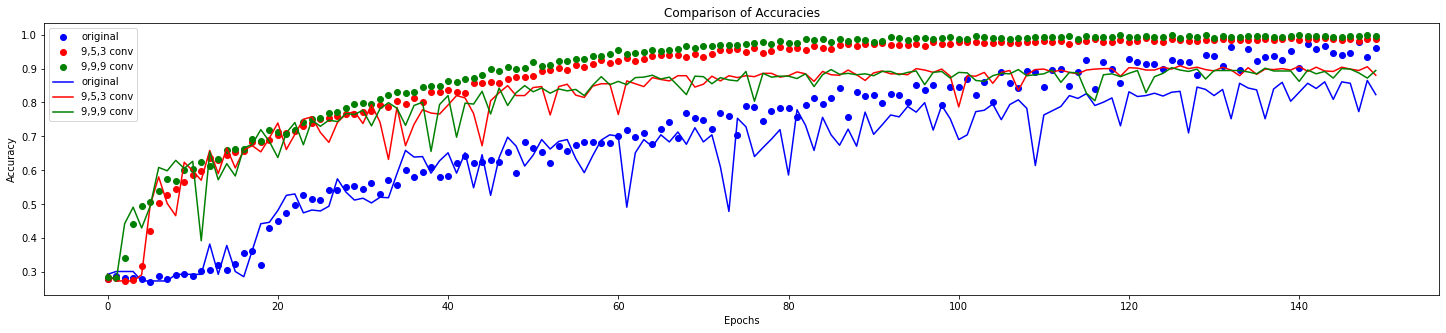

In [79]:
df1 = pd.read_csv('C:/Users/PC/Desktop/projekt/history_CNN2_V3.csv')
df2 = pd.read_csv('C:/Users/PC/Desktop/projekt/dropout_diffsize.csv')
df3 = pd.read_csv('C:/Users/PC/Desktop/projekt/dropout_diffsize3.csv')

a1 = df1['acc'] 
a2 = df2['acc'] 
a3 = df3['acc'] 
a1v = df1['val_acc'] 
a2v = df2['val_acc'] 
a3v = df3['val_acc'] 
label1 = 'original'
label2 = '9,5,3 conv'
label3 = '9,9,9 conv'

Compare3Accuracy(a1,a1v,a2,a2v,a3,a3v,label1,label2,label3)

### NewModel1

In [30]:
probdrop=0.15

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (9, 9), activation='relu', input_shape=(RES, RES, 1)))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Conv2D(64, (9, 9), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Conv2D(64, (5, 5), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Dense(4, activation='softmax'))

In [31]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 120, 120, 32)      2624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 40, 40, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 40, 40, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 64)        165952    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 10, 10, 64)       

In [32]:
epochs = 150       # the number of training epochs
batch_size = 64  # the size of mini-batches used for training the network in one step

model3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model3.save_weights(model_dir + 'newmodel1.h5')

history = model3.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
34/34 [==============================] - 3s 61ms/step - loss: 1.3626 - acc: 0.2825 - val_loss: 1.3472 - val_acc: 0.2925
Epoch 2/150
34/34 [==============================] - 1s 40ms/step - loss: 1.3557 - acc: 0.2839 - val_loss: 1.3345 - val_acc: 0.3022
Epoch 3/150
34/34 [==============================] - 1s 40ms/step - loss: 1.3448 - acc: 0.2728 - val_loss: 1.3396 - val_acc: 0.3259
Epoch 4/150
34/34 [==============================] - 1s 39ms/step - loss: 1.2967 - acc: 0.3857 - val_loss: 1.2059 - val_acc: 0.5362
Epoch 5/150
34/34 [==============================] - 1s 39ms/step - loss: 1.1973 - acc: 0.4661 - val_loss: 1.1499 - val_acc: 0.5404
Epoch 6/150
34/34 [==============================] - 1s 40ms/step - loss: 1.1445 - acc: 0.5084 - val_loss: 1.0789 - val_acc: 0.5682
Epoch 7/150
34/34 [==============================] - 1s 40ms/step - loss: 1.0966 - acc: 0.5256 - val_loss: 1.1274 - val_acc: 0.4694
Epoch 8/150
34/34 [==============================] - 1s 40ms/step - loss: 1.

In [33]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'NewModel1.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

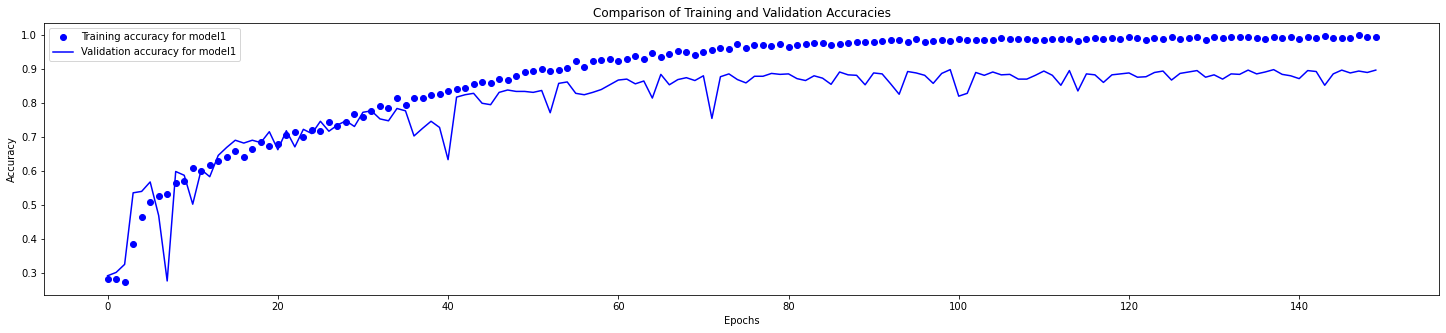

In [34]:
df = pd.read_csv('C:/Users/PC/Desktop/projekt/NewModel1.csv')
acc1 = df['acc']
val_acc1 = df['val_acc']

PlotAccuracy(acc1, val_acc1, 'model1')

### NewModel2

In [9]:
probdrop=0.15

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (9, 9), activation='relu', input_shape=(RES, RES, 1)))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Conv2D(64, (9, 9), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Dense(4, activation='softmax'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 120, 120, 32)      2624      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 40, 40, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        165952    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)             

In [10]:
epochs = 150       # the number of training epochs
batch_size = 64  # the size of mini-batches used for training the network in one step

model3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model3.save_weights(model_dir + 'newmodel2.h5')

history = model3.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
34/34 [==============================] - 2s 45ms/step - loss: 1.3700 - acc: 0.2746 - val_loss: 1.3418 - val_acc: 0.2744
Epoch 2/150
34/34 [==============================] - 1s 39ms/step - loss: 1.3520 - acc: 0.2849 - val_loss: 1.3296 - val_acc: 0.3022
Epoch 3/150
34/34 [==============================] - 1s 40ms/step - loss: 1.3355 - acc: 0.3025 - val_loss: 1.3031 - val_acc: 0.5515
Epoch 4/150
34/34 [==============================] - 1s 40ms/step - loss: 1.2837 - acc: 0.3852 - val_loss: 1.2134 - val_acc: 0.4833
Epoch 5/150
34/34 [==============================] - 1s 42ms/step - loss: 1.2235 - acc: 0.4489 - val_loss: 1.1458 - val_acc: 0.5682
Epoch 6/150
34/34 [==============================] - 1s 41ms/step - loss: 1.1667 - acc: 0.4954 - val_loss: 1.0914 - val_acc: 0.5460
Epoch 7/150
34/34 [==============================] - 1s 40ms/step - loss: 1.1235 - acc: 0.5372 - val_loss: 1.0387 - val_acc: 0.5822
Epoch 8/150
34/34 [==============================] - 1s 39ms/step - loss: 1.

In [12]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'NewModel2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

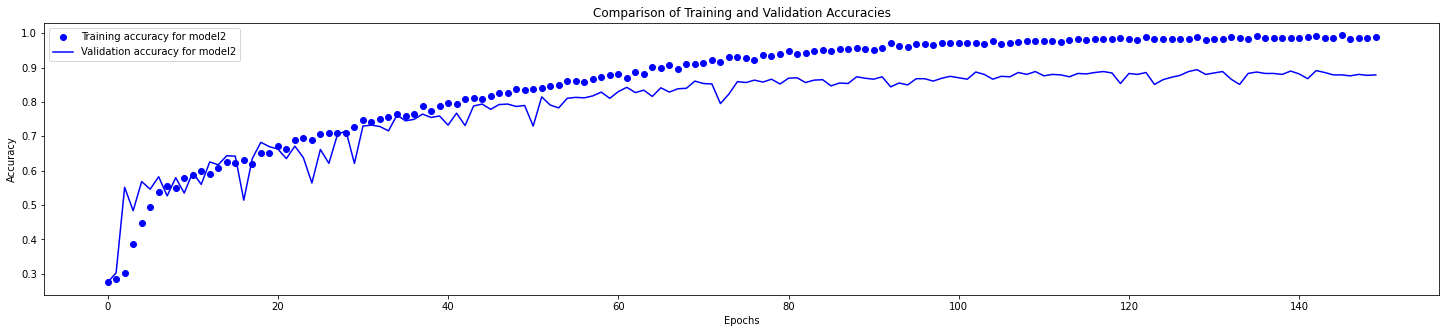

In [26]:
df = pd.read_csv('C:/Users/PC/Desktop/projekt/NewModel2.csv')
acc1 = df['acc']
val_acc1 = df['val_acc']

PlotAccuracy(acc1, val_acc1, 'model2')

### NewModel3

In [11]:
probdrop=0.15

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (9, 9), activation='relu', input_shape=(RES, RES, 1)))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Conv2D(64, (9, 9), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Dense(4, activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 120, 120, 32)      2624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 40, 40, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        165952    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6400)             

In [13]:
epochs = 150       # the number of training epochs
batch_size = 64  # the size of mini-batches used for training the network in one step

model3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])


model3.save_weights(model_dir + 'newmodel3.h5')

history = model3.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
34/34 [==============================] - 2s 43ms/step - loss: 1.3661 - acc: 0.2830 - val_loss: 1.3447 - val_acc: 0.2939
Epoch 2/150
34/34 [==============================] - 1s 38ms/step - loss: 1.3535 - acc: 0.2918 - val_loss: 1.3427 - val_acc: 0.2981
Epoch 3/150
34/34 [==============================] - 1s 39ms/step - loss: 1.3225 - acc: 0.3611 - val_loss: 1.2585 - val_acc: 0.3315
Epoch 4/150
34/34 [==============================] - 1s 38ms/step - loss: 1.2702 - acc: 0.4294 - val_loss: 1.1917 - val_acc: 0.5320
Epoch 5/150
34/34 [==============================] - 1s 38ms/step - loss: 1.1901 - acc: 0.4986 - val_loss: 1.1300 - val_acc: 0.5348
Epoch 6/150
34/34 [==============================] - 1s 38ms/step - loss: 1.1406 - acc: 0.5139 - val_loss: 1.1436 - val_acc: 0.5111
Epoch 7/150
34/34 [==============================] - 1s 39ms/step - loss: 1.1231 - acc: 0.5246 - val_loss: 1.1075 - val_acc: 0.5042
Epoch 8/150
34/34 [==============================] - 1s 38ms/step - loss: 1.

In [14]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'NewModel3.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

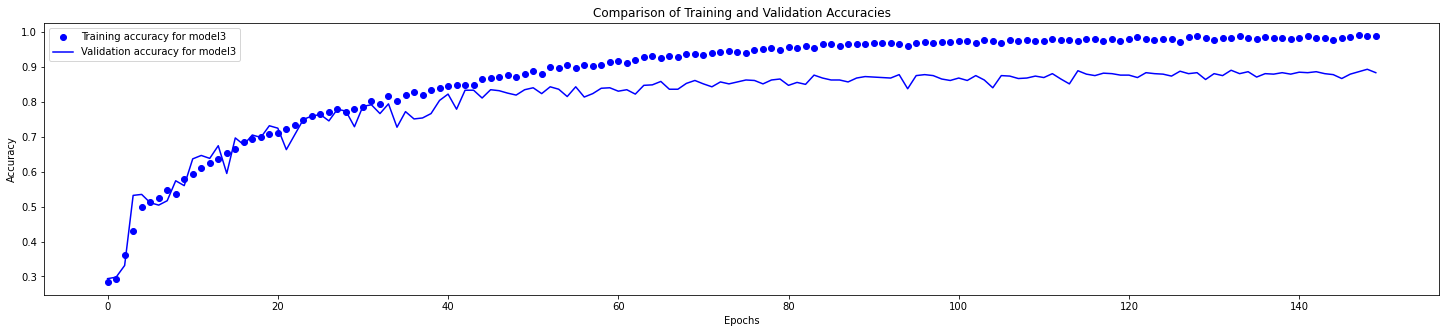

In [25]:
df = pd.read_csv('C:/Users/PC/Desktop/projekt/NewModel3.csv')
acc1 = df['acc']
val_acc1 = df['val_acc']

PlotAccuracy(acc1, val_acc1, 'model3')

### NewModel 4

In [18]:
probdrop=0.15

model3 = models.Sequential()
model3.add(layers.Conv2D(64, (9, 9), activation='relu', input_shape=(RES, RES, 1)))
model3.add(layers.MaxPooling2D((5, 5)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Conv2D(64, (9, 9), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Dense(4, activation='softmax'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 120, 120, 64)      5248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_11 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        331840    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1600)             

In [19]:
epochs = 150       # the number of training epochs
batch_size = 64  # the size of mini-batches used for training the network in one step

model3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model3.save_weights(model_dir + 'newmodel4.h5')

history = model3.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
34/34 [==============================] - 4s 73ms/step - loss: 1.3947 - acc: 0.2909 - val_loss: 1.3619 - val_acc: 0.2744
Epoch 2/150
34/34 [==============================] - 2s 55ms/step - loss: 1.3627 - acc: 0.2723 - val_loss: 1.3452 - val_acc: 0.3022
Epoch 3/150
34/34 [==============================] - 2s 54ms/step - loss: 1.3491 - acc: 0.3030 - val_loss: 1.3419 - val_acc: 0.3914
Epoch 4/150
34/34 [==============================] - 2s 55ms/step - loss: 1.3276 - acc: 0.3257 - val_loss: 1.3450 - val_acc: 0.3301
Epoch 5/150
34/34 [==============================] - 2s 55ms/step - loss: 1.3008 - acc: 0.4001 - val_loss: 1.3291 - val_acc: 0.4109
Epoch 6/150
34/34 [==============================] - 2s 55ms/step - loss: 1.2706 - acc: 0.4405 - val_loss: 1.2215 - val_acc: 0.4053
Epoch 7/150
34/34 [==============================] - 2s 54ms/step - loss: 1.2180 - acc: 0.4809 - val_loss: 1.2018 - val_acc: 0.4457
Epoch 8/150
34/34 [==============================] - 2s 55ms/step - loss: 1.

In [20]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'NewModel4.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

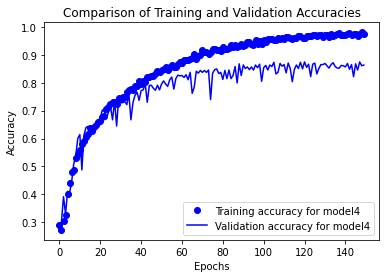

In [23]:
acc1 = history.history['acc']
val_acc1 = history.history['val_acc']

PlotAccuracy(acc1, val_acc1, 'model4')

### Neewmodel5

In [15]:
probdrop=0.15

model3 = models.Sequential()
model3.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(RES, RES, 1)))
model3.add(layers.MaxPooling2D((5, 5)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Flatten())
model3.add(layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dropout(probdrop))
model3.add(layers.Dense(4, activation='softmax'))

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 124, 124, 64)      1664      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3136)             

In [16]:
epochs = 150       # the number of training epochs
batch_size = 64  # the size of mini-batches used for training the network in one step

model3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
model3.save_weights(model_dir + 'newmodel5.h5')

history = model3.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/150
34/34 [==============================] - 3s 59ms/step - loss: 1.3819 - acc: 0.2904 - val_loss: 1.3542 - val_acc: 0.3022
Epoch 2/150
34/34 [==============================] - 2s 56ms/step - loss: 1.3600 - acc: 0.2811 - val_loss: 1.3527 - val_acc: 0.2744
Epoch 3/150
34/34 [==============================] - 2s 54ms/step - loss: 1.3565 - acc: 0.2886 - val_loss: 1.3444 - val_acc: 0.2939
Epoch 4/150
34/34 [==============================] - 2s 54ms/step - loss: 1.3550 - acc: 0.2900 - val_loss: 1.3423 - val_acc: 0.3593
Epoch 5/150
34/34 [==============================] - 2s 55ms/step - loss: 1.3475 - acc: 0.3160 - val_loss: 1.3312 - val_acc: 0.3022
Epoch 6/150
34/34 [==============================] - 2s 54ms/step - loss: 1.3327 - acc: 0.3606 - val_loss: 1.2984 - val_acc: 0.3510
Epoch 7/150
34/34 [==============================] - 2s 55ms/step - loss: 1.2840 - acc: 0.4298 - val_loss: 1.2416 - val_acc: 0.5390
Epoch 8/150
34/34 [==============================] - 2s 55ms/step - loss: 1.

In [17]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'NewModel5.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

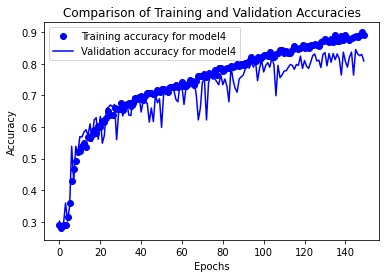

In [20]:
acc1 = history.history['acc']
val_acc1 = history.history['val_acc']

PlotAccuracy(acc1, val_acc1, 'model4')

# ResNet 50

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(RES,RES,3))

In [10]:
modelRes = resnet.output
modelRes = tf.keras.layers.GlobalAveragePooling2D()(modelRes)
modelRes = tf.keras.layers.Dropout(rate=0.5)(modelRes)
modelRes = tf.keras.layers.Dense(4,activation='softmax')(modelRes)
modelRes = tf.keras.models.Model(inputs=resnet.input, outputs = modelRes)

modelRes.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [11]:
modelRes.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['acc'])

In [12]:
historyRes = modelRes.fit(x_train_splitRES, y_train_splitRES,validation_data=(x_validation_splitRES,y_validation_splitRES), epochs =25, verbose=1, batch_size=32,
                   )

modelRes.save_weights(model_dir + 'modelResNEW.h5')


Epoch 1/25
68/68 [==============================] - 38s 339ms/step - loss: 0.6830 - acc: 0.7811 - val_loss: 2.3176 - val_acc: 0.2939
Epoch 2/25
68/68 [==============================] - 19s 278ms/step - loss: 0.2483 - acc: 0.9131 - val_loss: 1.5045 - val_acc: 0.3022
Epoch 3/25
68/68 [==============================] - 19s 278ms/step - loss: 0.1390 - acc: 0.9545 - val_loss: 1.7710 - val_acc: 0.1295
Epoch 4/25
68/68 [==============================] - 19s 279ms/step - loss: 0.3915 - acc: 0.8908 - val_loss: 5.1867 - val_acc: 0.2744
Epoch 5/25
68/68 [==============================] - 19s 280ms/step - loss: 0.1832 - acc: 0.9475 - val_loss: 3.9023 - val_acc: 0.1295
Epoch 6/25
68/68 [==============================] - 19s 280ms/step - loss: 0.2074 - acc: 0.9312 - val_loss: 427.6801 - val_acc: 0.3022
Epoch 7/25
68/68 [==============================] - 19s 280ms/step - loss: 0.0782 - acc: 0.9707 - val_loss: 4.9234 - val_acc: 0.1295
Epoch 8/25
68/68 [==============================] - 19s 280ms/step 

In [13]:
hist_df = pd.DataFrame(historyRes.history) 

hist_csv_file = 'historyRes.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

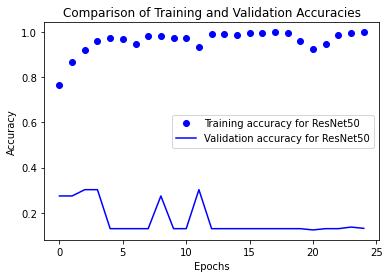

In [15]:
acc = historyRes.history['acc']
val_acc = historyRes.history['val_acc']

PlotAccuracy(acc, val_acc, 'ResNet50')

### ResNet50 v2

In [7]:
# Change to np array
x_train_cnRES = np.asarray(x_trainRES).reshape(len(x_trainRES), RES, RES, 3)
x_test_cnRES = np.asarray(x_testRES).reshape(len(x_testRES), RES, RES, 3)
y_train_cnRES = np.asarray(y_trainRES)
y_test_cnRES = np.asarray(y_testRES)

# Change to float32 to increase precision
x_train_cnRES = x_train_cnRES.astype('float32')
x_test_cnRES = x_test_cnRES.astype('float32')

# normalize data
x_train_cnRES = x_train_cnRES / 255.0
x_test_cnRES = x_test_cnRES / 255.0

# One hot encode labels
y_train_cnRES = tf.keras.utils.to_categorical(y_train_cnRES, 4)
y_test_cnRES = tf.keras.utils.to_categorical(y_test_cnRES, 4)

In [15]:
from tensorflow.keras.applications.resnet50 import ResNet50
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(RES,RES,3))

In [16]:
modelRes = resnet.output
modelRes = tf.keras.layers.GlobalAveragePooling2D()(modelRes)
modelRes = tf.keras.layers.Dropout(rate=0.5)(modelRes)
modelRes = tf.keras.layers.Dense(4,activation='softmax')(modelRes)
modelRes = tf.keras.models.Model(inputs=resnet.input, outputs = modelRes)

modelRes.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

In [18]:
modelRes.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['acc'])

In [13]:
historyRes = modelRes.fit(x_train_cnRES , y_train_cnRES ,validation_data=(x_test_cnRES,y_test_cnRES), epochs =25, verbose=1, batch_size=32,
                   )

modelRes.save_weights(model_dir + 'modelResv2')

Epoch 1/25
90/90 [==============================] - 39s 287ms/step - loss: 0.7308 - acc: 0.7672 - val_loss: 904.8345 - val_acc: 0.2919
Epoch 2/25
90/90 [==============================] - 21s 238ms/step - loss: 0.2951 - acc: 0.8993 - val_loss: 3.4275 - val_acc: 0.2665
Epoch 3/25
90/90 [==============================] - 23s 259ms/step - loss: 0.1952 - acc: 0.9338 - val_loss: 4.3563 - val_acc: 0.2665
Epoch 4/25
90/90 [==============================] - 23s 259ms/step - loss: 0.1045 - acc: 0.9638 - val_loss: 1.7371 - val_acc: 0.2665
Epoch 5/25
90/90 [==============================] - 23s 261ms/step - loss: 0.0836 - acc: 0.9739 - val_loss: 2.4208 - val_acc: 0.2665
Epoch 6/25
90/90 [==============================] - 23s 259ms/step - loss: 0.1727 - acc: 0.9502 - val_loss: 3.3441 - val_acc: 0.2665
Epoch 7/25
90/90 [==============================] - 23s 254ms/step - loss: 0.0597 - acc: 0.9787 - val_loss: 2.6113 - val_acc: 0.2690
Epoch 8/25
90/90 [==============================] - 25s 280ms/step 

In [14]:
hist_df = pd.DataFrame(historyRes.history) 

hist_csv_file = 'historyResv2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

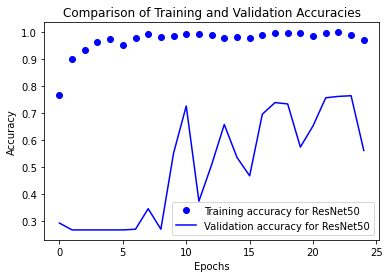

In [15]:
acc = historyRes.history['acc']
val_acc = historyRes.history['val_acc']

PlotAccuracy(acc, val_acc, 'ResNet50')

### ResNet50 v3

In [16]:
historyRes = modelRes.fit(x_train_cnRES , y_train_cnRES ,validation_data=(x_test_cnRES,y_test_cnRES), epochs =100, verbose=1, batch_size=32,
                   )

modelRes.save_weights(model_dir + 'modelResv3')

Epoch 1/100
90/90 [==============================] - 19s 211ms/step - loss: 0.1655 - acc: 0.9575 - val_loss: 57.8105 - val_acc: 0.5254
Epoch 2/100
90/90 [==============================] - 20s 222ms/step - loss: 0.1737 - acc: 0.9526 - val_loss: 238.3199 - val_acc: 0.3782
Epoch 3/100
90/90 [==============================] - 20s 225ms/step - loss: 0.5489 - acc: 0.8369 - val_loss: 93.8636 - val_acc: 0.2919
Epoch 4/100
90/90 [==============================] - 19s 211ms/step - loss: 0.2425 - acc: 0.9136 - val_loss: 2.4659 - val_acc: 0.6015
Epoch 5/100
90/90 [==============================] - 18s 201ms/step - loss: 0.0657 - acc: 0.9784 - val_loss: 2.4606 - val_acc: 0.6675
Epoch 6/100
90/90 [==============================] - 17s 188ms/step - loss: 0.0245 - acc: 0.9937 - val_loss: 1.9838 - val_acc: 0.7259
Epoch 7/100
90/90 [==============================] - 17s 190ms/step - loss: 0.0216 - acc: 0.9941 - val_loss: 2.2842 - val_acc: 0.7132
Epoch 8/100
90/90 [==============================] - 17s 1

In [17]:
hist_df = pd.DataFrame(historyRes.history) 

hist_csv_file = 'historyResv3.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

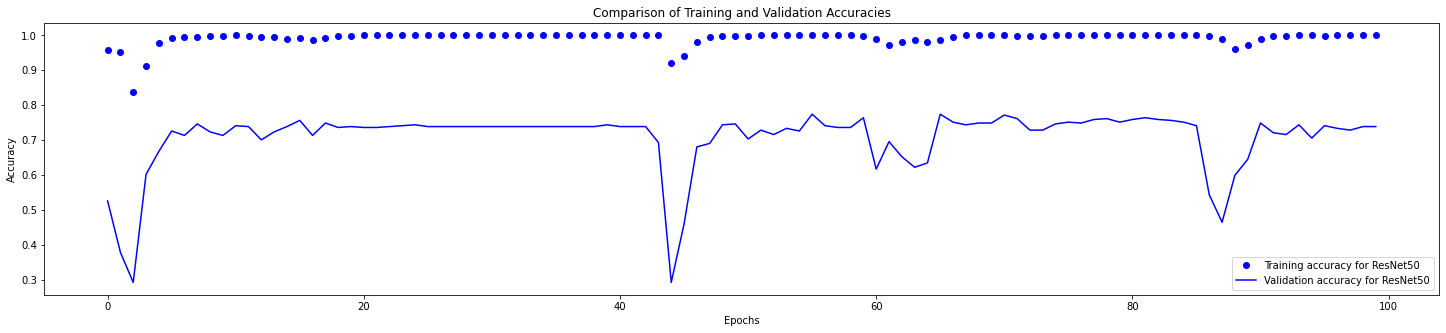

In [18]:
acc = historyRes.history['acc']
val_acc = historyRes.history['val_acc']

PlotAccuracy(acc, val_acc, 'ResNet50')

Better accuracy with more images. But there is no more training images for even better results

### ResNet50 with augmented images

In [8]:
# Change to np array
x_train_cnRES = np.asarray(x_trainRES).reshape(len(x_trainRES), RES, RES, 3)
x_test_cnRES = np.asarray(x_testRES).reshape(len(x_testRES), RES, RES, 3)
y_train_cnRES = np.asarray(y_trainRES)
y_test_cnRES = np.asarray(y_testRES)

# Change to float32 to increase precision
x_train_cnRES = x_train_cnRES.astype('float32')
x_test_cnRES = x_test_cnRES.astype('float32')

# normalize data
x_train_cnRES = x_train_cnRES / 255.0
x_test_cnRES = x_test_cnRES / 255.0

# One hot encode labels
y_train_cnRES = tf.keras.utils.to_categorical(y_train_cnRES, 4)
y_test_cnRES = tf.keras.utils.to_categorical(y_test_cnRES, 4)

In [9]:
datagen = ImageDataGenerator(
    rotation_range=7, #rotate images
    width_shift_range=0.05,
    height_shift_range=0.05, #shift image in horizontal and vertical
    zoom_range=0.1, #zoom images
    horizontal_flip=True)

AugmentedX = x_train_cnRES

datagen.fit(AugmentedX)

In [10]:
bothTestX = np.concatenate((x_train_cnRES,AugmentedX))
bothTestY = np.concatenate((y_train_cnRES,y_train_cnRES))

In [11]:
bothTestX

array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
  

In [19]:
historyRes3 = modelRes.fit(AugmentedX , y_train_cnRES ,validation_data=(x_test_cnRES,y_test_cnRES), epochs =25, verbose=1, batch_size=4,
                   )

modelRes.save_weights(model_dir + 'modelResv3Aug')

Epoch 1/25
718/718 [==============================] - 67s 72ms/step - loss: 1.3917 - acc: 0.4822 - val_loss: 7.5376 - val_acc: 0.2538
Epoch 2/25
718/718 [==============================] - 49s 69ms/step - loss: 0.9520 - acc: 0.6105 - val_loss: 3.9174 - val_acc: 0.2538
Epoch 3/25
718/718 [==============================] - 49s 69ms/step - loss: 0.8651 - acc: 0.6523 - val_loss: 2.0038 - val_acc: 0.2563
Epoch 4/25
718/718 [==============================] - 49s 69ms/step - loss: 0.7323 - acc: 0.7118 - val_loss: 4.0835 - val_acc: 0.3883
Epoch 5/25
718/718 [==============================] - 50s 69ms/step - loss: 0.6242 - acc: 0.7613 - val_loss: 9.0722 - val_acc: 0.3249
Epoch 6/25
718/718 [==============================] - 49s 69ms/step - loss: 0.5443 - acc: 0.7951 - val_loss: 9.1079 - val_acc: 0.4010
Epoch 7/25
718/718 [==============================] - 49s 68ms/step - loss: 0.5003 - acc: 0.8178 - val_loss: 35.7974 - val_acc: 0.2919
Epoch 8/25
718/718 [==============================] - 49s 68m

In [20]:
hist_df = pd.DataFrame(historyRes3.history) 

hist_csv_file = 'historyResv3aug.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

### ResNet comparision

In [46]:
df1 = pd.read_csv('C:/Users/PC/Desktop/projekt/historyRes.csv')
df2 = pd.read_csv('C:/Users/PC/Desktop/projekt/historyResv2.csv')
df3 = pd.read_csv('C:/Users/PC/Desktop/projekt/historyResv3aug.csv')

In [56]:
a1 = df1['acc'] 
a2 = df2['acc'] 
a3 = df3['acc'] 
a1v = df1['val_acc'] 
a2v = df2['val_acc'] 
a3v = df3['val_acc'] 
label1 = '75% split'
label2 = 'no split'
label3 = 'no split and augmented images'

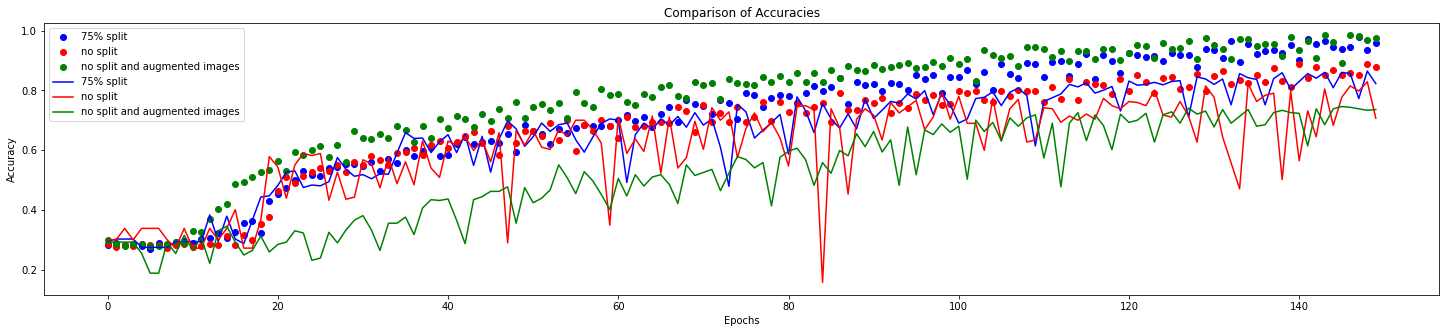

In [57]:
Compare3Accuracy(a1,a1v,a2,a2v,a3,a3v,label1,label2,label3)

# Networks found online
(but not working)

### Network from article: MRI-based brain tumour image detection using CNN based deep learning method
https://www.sciencedirect.com/science/article/pii/S277252862200022X

Declaring 99,74% accuracy in binary classification of MRI brain images (tumor, no tumor)

In [5]:
modelA = models.Sequential()
modelA.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(RES, RES, 1)))
modelA.add(layers.BatchNormalization())
modelA.add(layers.MaxPooling2D((2, 2)))
modelA.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelA.add(layers.BatchNormalization())
modelA.add(layers.MaxPooling2D((2, 2)))
modelA.add(layers.Flatten())
modelA.add(layers.Dense(512, activation='relu'))
modelA.add(layers.Dense(4, activation='softmax'))
modelA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       256       
 hNormalization)                                                 
                                                        

In [6]:
epochs = 50       # the number of training epochs
batch_size = 64  # the size of mini-batches used for training the network in one step

modelA.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

# Save weights of the model before training to enable to start training it again
modelA.save_weights(model_dir + 'projekt_Article.h5')

historyA = modelA.fit(x_train_split, y_train_split, epochs = epochs, batch_size = batch_size, validation_data=(x_validation_split,y_validation_split))

Epoch 1/50
34/34 [==============================] - 13s 116ms/step - loss: 1.6367 - acc: 0.5892 - val_loss: 1.3441 - val_acc: 0.3022
Epoch 2/50
34/34 [==============================] - 3s 87ms/step - loss: 0.5575 - acc: 0.7658 - val_loss: 1.3432 - val_acc: 0.2939
Epoch 3/50
34/34 [==============================] - 3s 86ms/step - loss: 0.4097 - acc: 0.8415 - val_loss: 1.3735 - val_acc: 0.3022
Epoch 4/50
34/34 [==============================] - 3s 85ms/step - loss: 0.3121 - acc: 0.8862 - val_loss: 1.3511 - val_acc: 0.3022
Epoch 5/50
34/34 [==============================] - 3s 85ms/step - loss: 0.1449 - acc: 0.9480 - val_loss: 1.4511 - val_acc: 0.3022
Epoch 6/50
34/34 [==============================] - 3s 85ms/step - loss: 0.1643 - acc: 0.9419 - val_loss: 1.4441 - val_acc: 0.1685
Epoch 7/50
34/34 [==============================] - 3s 85ms/step - loss: 0.1054 - acc: 0.9628 - val_loss: 1.6955 - val_acc: 0.3036
Epoch 8/50
34/34 [==============================] - 3s 84ms/step - loss: 0.0810 -

In [7]:
hist_df = pd.DataFrame(historyA.history) 

hist_csv_file = 'historyArticle2.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

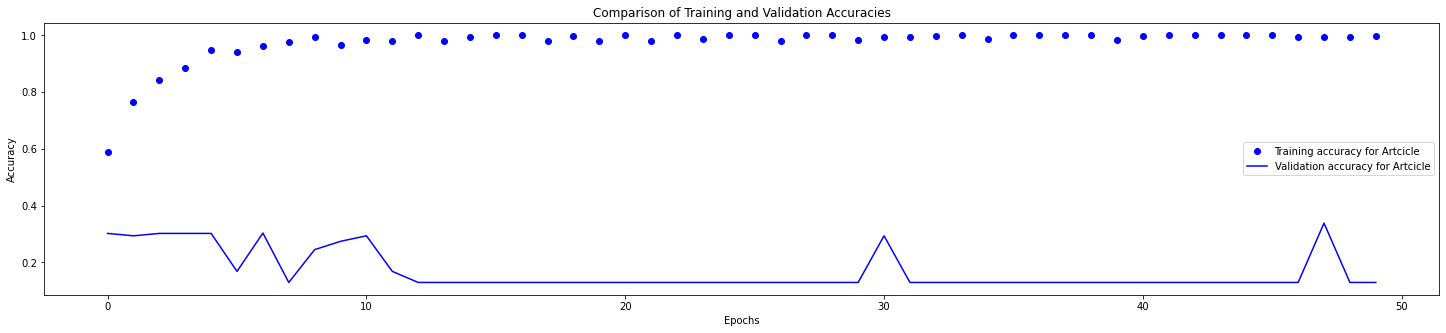

In [16]:
acc = historyA.history['acc']
val_acc = historyA.history['val_acc']

PlotAccuracy(acc, val_acc,'Artcicle')

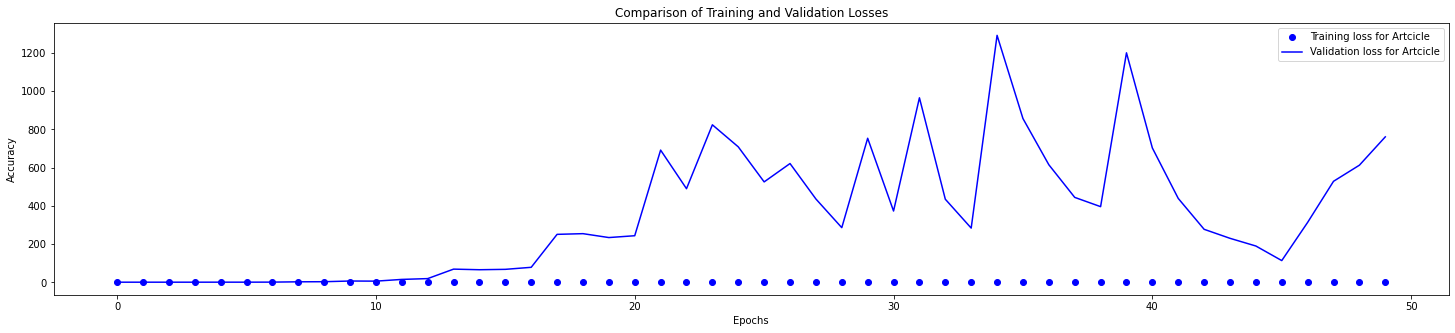

In [14]:
loss = historyA.history['loss']
val_loss = historyA.history['val_loss']

PlotLoss(loss, val_loss,'Artcicle')

### EfficientNet3
https://www.kaggle.com/code/die9origephit/brain-tumor-classifier-97-accuracy

In [13]:
EfficientNet=EfficientNetB3(weights='imagenet', include_top=False,input_shape=(RES,RES,3))

tf.random.set_seed(45)
model = EfficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.55)(model)
model = tf.keras.layers.Dense(60,activation='elu',kernel_initializer='GlorotNormal')(model)
model = tf.keras.layers.Dropout(rate=0.3)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=EfficientNet.input, outputs = model)
opt = Adam(learning_rate=0.000016, beta_1=0.91, beta_2=0.9994,
    epsilon=1e-08)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc']) 

#print(model.summary())

early_stopping_cb=keras.callbacks.EarlyStopping(patience=9,restore_best_weights=True)

model.save_weights(model_dir + 'projekt_test160.h5')

history=model.fit(x_train_cnRES, y_train_cnRES,validation_data = (x_test_cnRES,y_test_cnRES),epochs=90,
    batch_size=13,callbacks=early_stopping_cb)



Epoch 1/90
221/221 [==============================] - 64s 226ms/step - loss: 1.3730 - acc: 0.3725 - val_loss: 1.6333 - val_acc: 0.2538
Epoch 2/90
221/221 [==============================] - 48s 216ms/step - loss: 1.0951 - acc: 0.5199 - val_loss: 530.2672 - val_acc: 0.2259
Epoch 3/90
221/221 [==============================] - 48s 216ms/step - loss: 0.9345 - acc: 0.6042 - val_loss: 35.4691 - val_acc: 0.3198
Epoch 4/90
221/221 [==============================] - 48s 216ms/step - loss: 0.8454 - acc: 0.6533 - val_loss: 92.3674 - val_acc: 0.2792
Epoch 5/90
221/221 [==============================] - 49s 221ms/step - loss: 0.7954 - acc: 0.6666 - val_loss: 1540.8400 - val_acc: 0.3046
Epoch 6/90
221/221 [==============================] - 49s 221ms/step - loss: 0.6929 - acc: 0.7216 - val_loss: 2039.9010 - val_acc: 0.2766
Epoch 7/90
221/221 [==============================] - 49s 223ms/step - loss: 0.6486 - acc: 0.7359 - val_loss: 18.0471 - val_acc: 0.2640
Epoch 8/90
221/221 [========================

In [23]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'historyTest2new.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [24]:
# Augmented images

EfficientNet=EfficientNetB3(weights='imagenet', include_top=False,input_shape=(RES,RES,3))

datagen = ImageDataGenerator(
    rotation_range=7, #rotate images
    width_shift_range=0.05,
    height_shift_range=0.05, #shift image in horizontal and vertical
    zoom_range=0.1, #zoom images
    horizontal_flip=True)

AugmentedX = x_train_cnRES

datagen.fit(AugmentedX)

tf.random.set_seed(45)
model = EfficientNet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.55)(model)
model = tf.keras.layers.Dense(60,activation='elu',kernel_initializer='GlorotNormal')(model)
model = tf.keras.layers.Dropout(rate=0.3)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=EfficientNet.input, outputs = model)
opt = Adam(learning_rate=0.000016, beta_1=0.91, beta_2=0.9994,
    epsilon=1e-08)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc']) 

#print(model.summary())

early_stopping_cb=keras.callbacks.EarlyStopping(patience=9,restore_best_weights=True)

model.save_weights(model_dir + 'projekt_Dropout22.h5')

history=model.fit(AugmentedX, y_train_cnRES,validation_data = (x_test_cnRES,y_test_cnRES),epochs=90,
    batch_size=13,callbacks=early_stopping_cb)


Epoch 1/90
221/221 [==============================] - 54s 187ms/step - loss: 1.3732 - acc: 0.3725 - val_loss: 1.6350 - val_acc: 0.2538
Epoch 2/90
221/221 [==============================] - 39s 177ms/step - loss: 1.0950 - acc: 0.5178 - val_loss: 1238.0566 - val_acc: 0.2817
Epoch 3/90
221/221 [==============================] - 39s 176ms/step - loss: 0.9355 - acc: 0.6007 - val_loss: 9.0878 - val_acc: 0.2538
Epoch 4/90
221/221 [==============================] - 39s 177ms/step - loss: 0.8453 - acc: 0.6537 - val_loss: 1.6619 - val_acc: 0.2487
Epoch 5/90
221/221 [==============================] - 39s 177ms/step - loss: 0.7960 - acc: 0.6634 - val_loss: 4696.8687 - val_acc: 0.2843
Epoch 6/90
221/221 [==============================] - 39s 177ms/step - loss: 0.6930 - acc: 0.7233 - val_loss: 64.2282 - val_acc: 0.2640
Epoch 7/90
221/221 [==============================] - 39s 176ms/step - loss: 0.6487 - acc: 0.7352 - val_loss: 23.2409 - val_acc: 0.2716
Epoch 8/90
221/221 [===========================

In [ ]:
hist_df = pd.DataFrame(history.history) 

hist_csv_file = 'historyTest3.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)